## Dependencias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs # Generador de datos
from sklearn.linear_model import PassiveAggressiveClassifier # generador de clasificador
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score # calculo de accuracy


* from sklearn.datasets import make_blobs -> La función make_blobs de la biblioteca Scikit-learn (sklearn) se utiliza para generar un conjunto de datos simulados que consta de varias "burbujas" o grupos de puntos con características similares. En otras palabras, esta función crea un conjunto de datos de prueba en forma de grupos o clústeres, que se pueden utilizar para probar algoritmos de clustering o clasificación.

---

* from sklearn.linear_model import PassiveAggressiveClassifier --> PassiveAggressiveClassifier es un algoritmo de aprendizaje automático para la clasificación binaria en línea y con aprendizaje activo. Es una variante del Perceptron, que es un modelo lineal de clasificación binaria que clasifica los puntos de datos según su ubicación en un espacio de características linealmente separable. El modelo "aprende" iterativamente a través de las actualizaciones de peso basadas en la predicción incorrecta.

La diferencia clave entre el Perceptron y PassiveAggressiveClassifier es que este último tiene un parámetro de regularización que controla la magnitud de las actualizaciones de peso en cada iteración. En situaciones donde los datos cambian con el tiempo, la tasa de aprendizaje debe ser ajustada de manera adaptativa para que el modelo se adapte a los cambios.

---

* from sklearn.svm import SVC  -->  es la clase de la implementación de Support Vector Machines (SVM) para problemas de clasificación en Scikit-learn. SVM es un algoritmo de aprendizaje automático popular que se utiliza tanto para problemas de clasificación como de regresión. Es un modelo que aprende una función de decisión lineal para separar los datos de entrada en dos clases distintas.

En Scikit-learn, la clase SVC implementa el algoritmo SVM para clasificación

---

* from sklearn.metrics import accuracy_score  --> accuracy_score es una función de Scikit-learn que se utiliza para calcular la precisión de un modelo de clasificación. Toma dos argumentos: las etiquetas verdaderas (ground truth) y las etiquetas predichas, y devuelve la proporción de predicciones correctas. La precisión es una de las métricas más comunes para evaluar el rendimiento de un modelo de clasificación

## Generación de datos sintéticos

In [2]:
X,y = make_blobs(100,          # Numero de datos
                 2,            # Numero de caracteristicas
                 centers=2,    # Numero de clases
                 cluster_std=16) # Generamos datos aleatorios con 2 clases y 2 caracteristicas (2D)

### Conjunto de entrenamiento $S_n = \{(x^{(i)},y^{(i)}),i=1,\ldots,n\}$

In [3]:
Sn = pd.DataFrame(X,columns=['x1','x2']) # Creamos un dataframe con los datos de entrada X y las etiquetas de salida y 
Sn['y'] = y # Añadimos la columna de etiquetas de salida y al dataframe Sn 

In [4]:
Sn.head() # Mostramos las 5 primeras filas del dataframe Sn

,x1,x2,y
0,-5.699117,3.288472,1
1,-6.233682,7.149498,1
2,11.961222,22.588865,1
3,-12.569717,32.408695,1
4,-38.282034,-35.706363,1


### Visualización de los datos

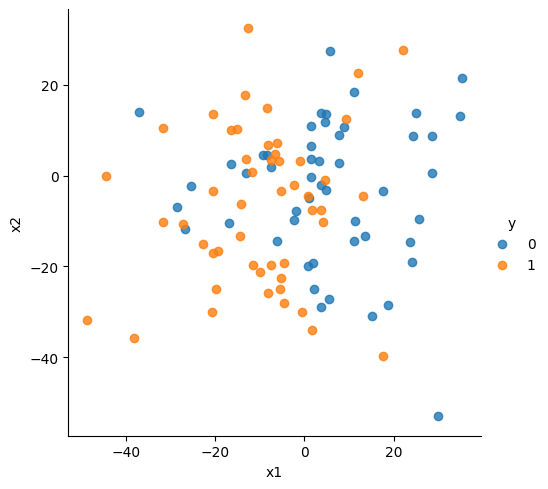

In [5]:
sns.lmplot(data=Sn,  # Datos de entrada
           x='x1',   # Caracteristica 1 de entrada 
           y='x2',  # Caracteristica 2 de entrada 
           hue='y',  # Etiquetas de salida 
           fit_reg=False);  # No dibujamos la recta de regresion 

# Mostramos los datos en un grafico de dispersion con las etiquetas de salida y como color de los puntos

## Pasivo-Agresivo

In [6]:
pa = PassiveAggressiveClassifier(C=0.1) # Creamos un clasificador PA con C=0.1 
pa.fit(X,y) # Entrenamos el clasificador con los datos de entrada X y las etiquetas de salida y 


PassiveAggressiveClassifier(C=0.1)

### Parámetros del modelo

In [7]:
pa.coef_,pa.intercept_ # Mostramos los coeficientes del clasificador PA 

(array([[-0.22933193, -0.05500062]]), array([-0.10893153]))

### Graficamos la recta de separación

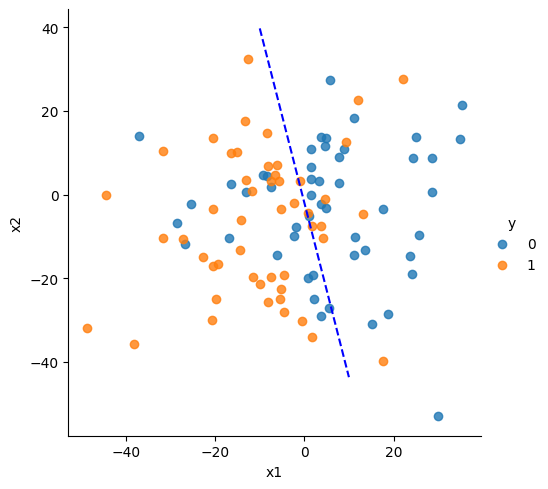

In [8]:
theta,theta0 = pa.coef_[0],pa.intercept_[0] # Extraemos los coeficientes del clasificador PA 
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False) # Mostramos los datos en un grafico de dispersion con las etiquetas de salida y como color de los puntos 
x1 = np.linspace(-10,10,100) # Generamos 100 puntos equiespaciados entre -10 y 10 
x2 = (-theta0-theta[0]*x1)/theta[1] # Calculamos los valores de x2 para cada valor de x1 
plt.plot(x1,x2,linestyle='--',color='blue') # Dibujamos la recta de separacion del clasificador PA 

## SVM

In [9]:
svc = SVC(C=0.1,kernel='linear') # Creamos un clasificador SVC con C=0.1 y kernel lineal 
svc.fit(X,y) # Entrenamos el clasificador con los datos de entrada X y las etiquetas de salida y 

SVC(C=0.1, kernel='linear')

In [10]:
svc.intercept_,svc.coef_ # Mostramos los coeficientes del clasificador SVC 

(array([-0.16572548]), array([[-0.07564654, -0.01474309]]))

### Gráfica de la frontera de decisión

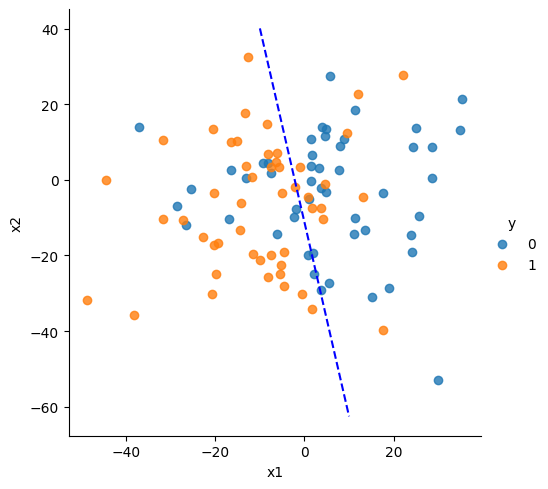

In [11]:
theta,theta0 = svc.coef_[0],svc.intercept_[0] # Extraemos los coeficientes del clasificador SVC 
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False) # Mostramos los datos en un grafico de dispersion con las etiquetas de salida y como color de los puntos 
x1 = np.linspace(-10,10,100) # Generamos 100 puntos equiespaciados entre -10 y 10 
x2 = (-theta0-theta[0]*x1)/theta[1] # Calculamos los valores de x2 para cada valor de x1 
plt.plot(x1,x2,linestyle='--',color='blue') # Dibujamos la recta de separacion del clasificador SVC 

## Métricas de evaluación

In [12]:
print({"pa":accuracy_score(y,pa.predict(X))}) # Calculamos el accuracy del clasificador PA 
print({"svc":accuracy_score(y,svc.predict(X))}) # Calculamos el accuracy del clasificador SVC 


{'pa': 0.71}
{'svc': 0.74}
